In [1]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np
import os

# Procesamiento de texto
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Algoritmos de clasificación y herramientas de validación cruzada y ajuste de hiperparámetros
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visualización de datos y resultados
import matplotlib.pyplot as plt
import seaborn as sns

# Descargar recursos de NLTK
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("averaged_perceptron_tagger")
nltk.download("universal_tagset")

# from google.colab import drive
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tag import pos_tag, map_tag

sns.set_context("talk")
sns.set(style="whitegrid")

np.set_printoptions(suppress=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pablonicolasr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pablonicolasr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pablonicolasr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pablonicolasr\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pablonicolasr\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\pablonicolasr\AppData\Roaming\nltk_data...
[nl

# Análisis y Visualización de Datos

In [2]:
# load dataset
df = pd.read_csv(os.path.join(os.getcwd(), "legal.csv"))

In [3]:
# dataset dimension
df.shape

(24985, 4)

In [4]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24985 entries, 0 to 24984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   case_id       24985 non-null  object
 1   case_outcome  24985 non-null  object
 2   case_title    24985 non-null  object
 3   case_text     24809 non-null  object
dtypes: object(4)
memory usage: 780.9+ KB


In [5]:
df.head(5)

,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...


In [6]:
# statistical measures of the dataset
df.describe()

,case_id,case_outcome,case_title,case_text
count,24985,24985,24985,24809
unique,24985,10,18581,17920
top,Case1,cited,Minister for Immigration and Ethnic Affairs v ...,submitted that this Court should hold that the...
freq,1,12219,70,42


In [7]:
# view column names
df.columns

Index(['case_id', 'case_outcome', 'case_title', 'case_text'], dtype='object')

In [8]:
# check for missing values
df.isnull().sum()

case_id           0
case_outcome      0
case_title        0
case_text       176
dtype: int64

In [9]:
df = df.dropna()
df.isnull().sum()

case_id         0
case_outcome    0
case_title      0
case_text       0
dtype: int64

In [10]:
# Reviso si hay filas duplicadas
df.duplicated().any() # Si, hay filas duplicadas, ya que aparece True.

False

# Ingeniería de Datos

In [11]:
# Importo las librerías necesarias para procesar los textos
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import re

SPECIAL_CHARACTERS = []

SPECIAL_CHARACTERS.extend(map(chr, range(0, 32)))
SPECIAL_CHARACTERS.extend(map(chr, range(33, 48)))
SPECIAL_CHARACTERS.extend(map(chr, range(58, 65)))
SPECIAL_CHARACTERS.extend(map(chr, range(91, 97)))
SPECIAL_CHARACTERS.extend(map(chr, range(123, 225)))
SPECIAL_CHARACTERS.extend(map(chr, range(226, 233)))
SPECIAL_CHARACTERS.extend(map(chr, range(234, 237)))
SPECIAL_CHARACTERS.extend(map(chr, range(238, 241)))
SPECIAL_CHARACTERS.extend(map(chr, range(242, 243)))
SPECIAL_CHARACTERS.extend(map(chr, range(244, 250)))
SPECIAL_CHARACTERS.extend(map(chr, range(251, 880)))

In [12]:
class CleanText():
    
    def __init__(self, text, language="english"):
        
        self.text = text
        
        self.language = language
        
        self.clean_text = None
        
        self.remove_spec_text = None
        
        self.remove_stop_text = None
        
        self.lemma_text = None
    
    def removePatterns(self):
        
        replacements = (
            ("á", "a"),
            ("é", "e"),
            ("í", "i"),
            ("ó", "o"),
            ("ú", "u"),
        )
        
        self.text = str(self.text)
        
        self.clean_text = self.text.lower()
        
        self.clean_text = re.sub(r"\s{2,}", " ", self.clean_text)
        
        self.clean_text = re.sub(r"\n", " ", self.clean_text)
        
        self.clean_text = re.sub(r"\d+", " ", self.clean_text)
        
        self.clean_text = re.sub(r"^\s+", " ", self.clean_text)
        
        self.clean_text = re.sub(r"\s+", " ", self.clean_text)
        
        for a, b in replacements:
            
            self.clean_text = self.clean_text.replace(a, b).replace(a.upper(), b.upper())
        
        return self.clean_text
    
    def removeSpecChars(self):
        
        remove_patterns = self.removePatterns()
        
        tokens = list(word_tokenize(remove_patterns))
        
        clean_tokens = tokens.copy()
        
        for i in range(len(clean_tokens)):
            
            for special_character in SPECIAL_CHARACTERS:
            
                clean_tokens[i] = clean_tokens[i].replace(special_character, '')            
            
        clean_tokens = [token for token in clean_tokens if token]        
        
        self.remove_spec_text = " ".join(clean_tokens)        
        
        return self.remove_spec_text       
    
    def RemoveStopText(self):
        
        st = ["'", "!", '"', "#", "$", "%", "&", "*", "+", "-", ".", "/", "<", "=", '>', "?",
          "@", "[", "\\", "]", "^", "_", '`', "{", "|", "}", '~']
        
        sw = stopwords.words(self.language) + st
        
        text = list(word_tokenize(self.removeSpecChars()))
        
        text = [w for w in text if not w in sw]
        
        self.remove_stop_text = " ".join(text)
        
        return self.remove_stop_text
    
    def lemmatizeText(self):
        
        lemmatizer = WordNetLemmatizer()
        
        list_lemma_text = []
        
        tokens = word_tokenize(self.RemoveStopText())
        
        for token in tokens:
            
            lemmetized_word = lemmatizer.lemmatize(token)
            
            list_lemma_text.append(lemmetized_word)
        
        self.lemma_text = " ".join(list_lemma_text)
        
        return self.lemma_text

In [38]:
df["clean_case_text"] = df["case_text"].map(lambda x: CleanText(str(x)).lemmatizeText())

In [39]:
df["clean_case_title"] = df["case_title"].map(lambda x: CleanText(str(x)).lemmatizeText())

In [40]:
df.to_csv("clean_text.csv", encoding="utf-8", index=False)

In [13]:
# load dataset
df = pd.read_csv(os.path.join(os.getcwd(), "clean_text.csv"))

In [14]:
df.head(5)

,case_id,case_outcome,case_title,case_text,clean_case_text,clean_case_title
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...,ordinarily discretion exercised cost follow ev...,alpine hardwood aust pty ltd v hardy pty ltd f...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...,general principle governing exercise discretio...,black v lipovac fca alr
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...,ordinarily discretion exercised cost follow ev...,colgate palmolive co v cussons pty ltd fcr
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...,general principle governing exercise discretio...,dais studio pty ltd v bullett creative pty ltd...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...,preceding general principle inform exercise di...,dr marten australia pty ltd v figgins holding ...


In [15]:
df.case_outcome.value_counts()

case_outcome
cited            12110
referred to       4363
applied           2438
followed          2252
considered        1699
discussed         1018
distinguished      603
related            112
approved           108
affirmed           106
Name: count, dtype: int64

In [16]:
df["case_outcome"] = df["case_outcome"].apply(lambda x: x if x == "cited" else "other")

In [17]:
df.case_outcome.value_counts()

case_outcome
other    12699
cited    12110
Name: count, dtype: int64

# El objetivo de este dataset es predecir si el label es cited o other

In [18]:
df_category = df.copy()

df_other = df_category[df_category.case_outcome == "other"]
df_cited = df_category[df_category.case_outcome == "cited"]

In [19]:
cv = CountVectorizer()

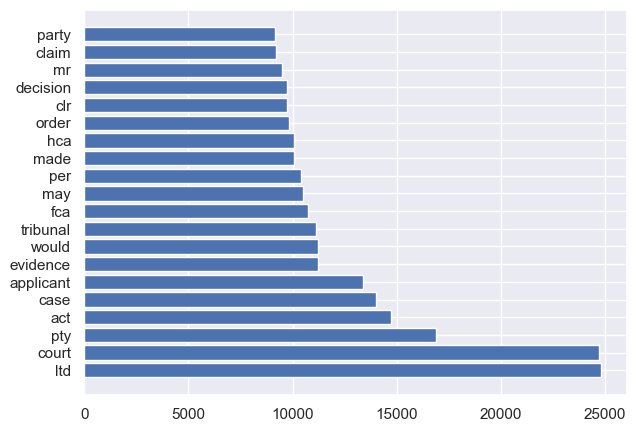

In [20]:
# Se ve cuales son las palabras mas frecuentes en la category == cited
sum_words_cited = cv.fit_transform(df_cited["clean_case_text"].values.astype("U")).sum(axis=0)

# Calculamos 
words_freq_cited = [(word, sum_words_cited[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq_cited = sorted(words_freq_cited, key = lambda x: x[1], reverse=True)[:20]

sns.set(font_scale=1)

plt.figure(figsize=(7, 5))
plt.barh(*zip(*words_freq_cited))

plt.show()

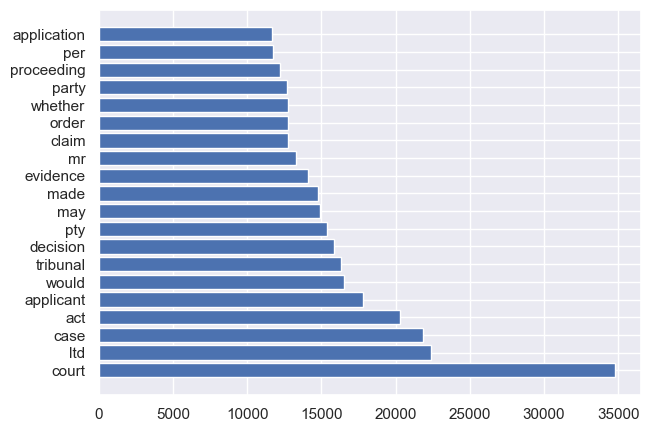

In [21]:
# Se ve cuales son las palabras mas frecuentes en la category == cited
sum_words_other = cv.fit_transform(df_other["clean_case_text"].values.astype("U")).sum(axis=0)

# Calculamos 
words_freq_other = [(word, sum_words_other[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq_other = sorted(words_freq_other, key = lambda x: x[1], reverse=True)[:20]

sns.set(font_scale=1)

plt.figure(figsize=(7, 5))
plt.barh(*zip(*words_freq_other))

plt.show()

# Se investiga cuales son las palabras unicas de la categoría de cited y de other

In [22]:
list_word_cited = [x[0] for x in words_freq_cited]
list_word_other = [y[0] for y in words_freq_other]

In [23]:
unique_word_cited = [x for x in list_word_cited if x not in list_word_other]
unique_word_other = [x for x in list_word_other if x not in list_word_cited]

In [24]:
print(unique_word_cited)
print(unique_word_other)

['fca', 'hca', 'clr']
['whether', 'proceeding', 'application']


# Construcción del modelo

In [25]:
X = df["clean_case_text"]
y = df["case_outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [27]:
# Definir los clasificadores con parámetros optimizados para rapidez
svm = SVC(C=1, kernel='linear')  # Usar un kernel lineal acelera el entrenamiento


# Entrenamiento de SVM
svm.fit(X_train_tfidf, y_train)

SVC(C=1, kernel='linear')

In [28]:
random_forest = RandomForestClassifier(n_estimators=100, max_features='sqrt')  # Ajustes rápidos para RandomForest

# Entrenamiento de RandomForest
random_forest.fit(X_train_tfidf, y_train)

RandomForestClassifier()

# Evaluación del Modelo

In [29]:
# Evaluación de SVM
y_pred_svm = svm.predict(X_test_tfidf)
print("Results for SVM:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred_svm)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred_svm)}")
print("-" * 50)

# Evaluación de RandomForest
y_pred_rf = random_forest.predict(X_test_tfidf)
print("Results for RandomForest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred_rf)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred_rf)}")
print("-" * 50)

Results for SVM:
Accuracy: 0.6684804514308746
Classification Report:
               precision    recall  f1-score   support

       cited       0.67      0.64      0.65      2440
       other       0.67      0.70      0.68      2522

    accuracy                           0.67      4962
   macro avg       0.67      0.67      0.67      4962
weighted avg       0.67      0.67      0.67      4962

Confusion Matrix:
 [[1561  879]
 [ 766 1756]]
--------------------------------------------------
Results for RandomForest:
Accuracy: 0.7251108424022572
Classification Report:
               precision    recall  f1-score   support

       cited       0.76      0.64      0.69      2440
       other       0.70      0.81      0.75      2522

    accuracy                           0.73      4962
   macro avg       0.73      0.72      0.72      4962
weighted avg       0.73      0.73      0.72      4962

Confusion Matrix:
 [[1554  886]
 [ 478 2044]]
--------------------------------------------------


# Aplicación Práctica

In [34]:
# Aplicación del modelo entrenado para predecir el resultado de casos legales nuevos
def predict_new_cases(model, new_cases):
    new_cases_processed = [CleanText(case).lemmatizeText() for case in new_cases]
    new_cases_tfidf = vectorizer.transform(new_cases_processed)
    predictions = model.predict(new_cases_tfidf)
    return predictions

In [35]:
# Ejemplo de uso con nuevos casos legales
new_cases = [
    '''The orders that can be made under the section are directed, 
    inter alia, to the preservation of assets against which recovery 
    may be sought in the event that liability to an 'aggrieved person' 
    is established on the part of a 'relevant person'. The orders are made in circumstances where 'an investigation is being carried out', 
    'a prosecution has been begun' or 'a civil proceeding has been begun'. 
    That is to say the orders can be made before liability is established and indeed before the evidence necessary to establish liability 
    has been collected. While an application under the section is not interlocutory in an existing criminal or civil proceeding, it is 
    interlocutory in a wider sense. It preserves the status quo and the assets of the relevant person pending the outcome of the investigation, 
    prosecution or civil proceedings which are on foot CAC v Lone Star Exploration NL( No 2) (1988) 14 ACLR 499 at 504. 
    At the stage an order is sought the Court may not be in a position to identify with precision any particular liability 
    owed by the person the subject of the proposed order. This consideration applies to final orders made under the section as 
    well as to interim orders for which it expressly provides in s 1323(3). The final orders made under the section are necessarily 
    of a temporary or holding character rather than finally disposing of the rights and liabilities of the relevant persons affected by them.''',
    '''As to the annulment of the 1994 bankruptcy, this Court has vested in it, by s 27 of the Bankruptcy Act 1966 (Cth), 
    exclusive jurisdiction in bankruptcy. The meaning of that expression has recently been considered by a Full Court of this Court 
    in the decision of Meriton Apartments Pty Ltd v Industrial Court of New South Wales [2008] FCAFC 172. It is unnecessary for present 
    purposes to determine the precise boundaries of the nature of jurisdiction in bankruptcy. It suffices to observe that an application 
    to annul a bankruptcy pursuant to s 153B lies squarely within the heartland of that jurisdiction. 9 Section 153B provides: Annulment by 
    Court (1) If the Court is satisfied that a sequestration order ought not to have been made or, in the case of a debtor's petition, 
    that the petition ought not to have been presented or ought not to have been accepted by the Official Receiver, 
    the Court may make an order annulling the bankruptcy. (2) In the case of a debtor's petition, the order may be made whether or not the 
    bankrupt was insolvent when the petition was presented. 10 It is apparent from a cursory reading of s 153B that there are two elements to it. 
    The first is the satisfaction in the Court of the fact that a sequestration order ought not to have been made. 
    The second is an exercise by the court of a discretionary power if that condition precedent is satisfied.'''
]

In [36]:
# Predecir con SVM
svm_predictions = predict_new_cases(svm, new_cases)
print("SVM Predictions for new cases:", svm_predictions)

SVM Predictions for new cases: ['other' 'cited']


In [37]:
# Predecir con RandomForest
rf_predictions = predict_new_cases(random_forest, new_cases)
print("RandomForest Predictions for new cases:", rf_predictions)

RandomForest Predictions for new cases: ['cited' 'other']
